In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!ls
!pwd


drive  sample_data
/content


In [16]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import datasets, layers, models

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
test_path = "/content/drive/My Drive/FliproboAssgn/Test"
train_path = "/content/drive/My Drive/FliproboAssgn/Train"


In [19]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
# load and iterate training dataset
train_image = datagen.flow_from_directory(train_path , class_mode='binary', batch_size=200)
# load and iterate validation dataset
test_image = datagen.flow_from_directory(test_path , class_mode='binary', batch_size=60)

train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()



Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [20]:


#Shape of images:
print('Shape of train images', train_images.shape)
print('Shape of test images',test_images.shape)
#print(y, y1)

Shape of train images (200, 256, 256, 3)
Shape of test images (60, 256, 256, 3)


In [21]:
#Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

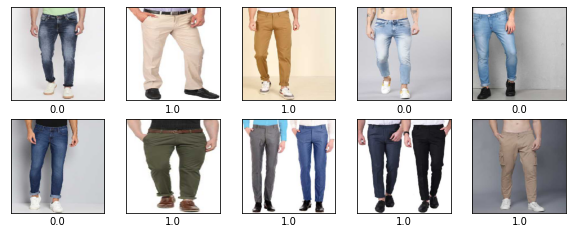

In [22]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

In [23]:
#CNN model to classify the handwritten numbers:

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 
  keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Dropout(0.1),
  keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(4,4)),
  keras.layers.Dropout(0.1),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

opt = keras.optimizers.Adam()

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])

Epoch 1/20
7/7 [==============================] - 15s 2s/step - loss: 2.4952 - accuracy: 0.5600 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.7082 - accuracy: 0.5350 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.6906 - accuracy: 0.5050 - val_loss: 0.6905 - val_accuracy: 0.5167
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.6806 - accuracy: 0.6250 - val_loss: 0.6866 - val_accuracy: 0.5667
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.6630 - accuracy: 0.5800 - val_loss: 0.6741 - val_accuracy: 0.7000
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.6181 - accuracy: 0.7500 - val_loss: 0.6349 - val_accuracy: 0.7000
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.5233 - accuracy: 0.8200 - val_loss: 0.5295 - val_accuracy: 0.8000
Epoch 8/20
7/7 [==================

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)       

7/7 - 4s - loss: 0.2781 - accuracy: 0.9000
2/2 - 1s - loss: 0.4539 - accuracy: 0.8000


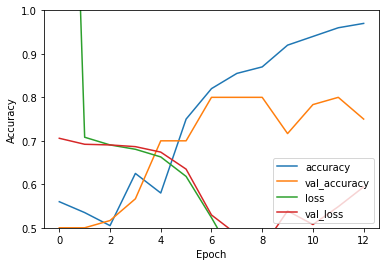

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
history.history['val_accuracy']

[0.5,
 0.5,
 0.5166666507720947,
 0.5666666626930237,
 0.699999988079071,
 0.699999988079071,
 0.800000011920929,
 0.800000011920929,
 0.800000011920929,
 0.7166666388511658,
 0.7833333611488342,
 0.800000011920929,
 0.75]

The accuracy and loss is fluctuating suggesting higher learning rate.